<a href="https://colab.research.google.com/github/abrishwon21/ML_in_Python/blob/master/NB_on_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Example of Naive Baye Algorithm on Breast Cancer dataset** 


In [7]:
#importing the neccesary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as trsp 
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix


In [13]:
#now let's store the loaded  data into dataset and convert it into dataframe and store into df_cancer
dataset = load_breast_cancer()
df_cancer=pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
df_cancer['target']=dataset['target']
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [17]:
df_cancer.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [20]:
#now let's split them
feature = df_cancer.loc[:,'mean radius':'worst fractal dimension']
target = df_cancer.loc[:,'target']
xtrain,xtest,ytrain,ytest = trsp(feature,target,test_size=0.30,random_state = 1)

In [22]:
#let's see the shape
print("The shape of xtrain ",xtrain.shape)
print("The shape of xtest ",xtest.shape)
print("The shape of ytrain ",ytrain.shape)
print("The shape of ytest ",ytest.shape)

The shape of xtrain  (398, 30)
The shape of xtest  (171, 30)
The shape of ytrain  (398,)
The shape of ytest  (171,)


In [39]:
#now train 
ac=[]
conf_mat=[]
lm=[GaussianNB(),MultinomialNB(),BernoulliNB()]
for i in range(len(lm)):
  lm[i].fit(xtrain,ytrain)
  pv=lm[i].predict(xtest)
  ac.append(accuracy_score(ytest,pv))
  conf_mat.append(confusion_matrix(ytest,pv))

<BarContainer object of 3 artists>

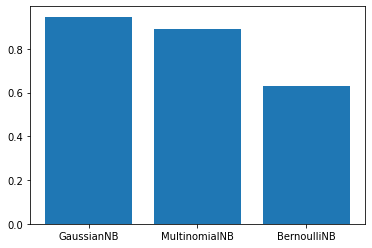

In [43]:
#visualize accuracy of each
plt.bar(['GaussianNB','MultinomialNB','BernoulliNB'],ac)

In [47]:
#show confusion matrix
conf_mat

[array([[ 58,   5],
        [  4, 104]]), array([[ 48,  15],
        [  4, 104]]), array([[  0,  63],
        [  0, 108]])]